# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

weather_df = pd.DataFrame()

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for x in range(0,len(cities)):
    full_url = f'{weather_url}q={cities[x]}&units=imperial{weather_api_key}'
    response = requests.get(full_url)
    if response.status_code == 200:
        response = response.json()
        print(f'Processing Record {x+1} of {len(cities)} | {cities[x]}')
        cur_city_dict = {'City':cities[x], 'Lat':response['coord']['lat'],	'Lng':response['coord']['lon'],
        'Max Temp':response['main']['temp_max'], 'Humidity':response['main']['humidity'], 'Cloudiness':response['clouds']['all'],
        'Wind Speed':response['wind']['speed'],	'Country':response['sys']['country'],	'Date':response['dt']}
        weather_df = weather_df.append(cur_city_dict, ignore_index=True)
    else:
        print(f'City not found. Skipping')

print(f'----------------------------- Data Retrieval Complete -----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 636 | bambous virieux
Processing Record 2 of 636 | ancud
Processing Record 3 of 636 | nikolskoye
Processing Record 4 of 636 | mataura
Processing Record 5 of 636 | butaritari
Processing Record 6 of 636 | jamestown
Processing Record 7 of 636 | opuwo
Processing Record 8 of 636 | hobart
Processing Record 9 of 636 | hilo
Processing Record 10 of 636 | upernavik
Processing Record 11 of 636 | livny
Processing Record 12 of 636 | bridlington
Processing Record 13 of 636 | moroni
Processing Record 14 of 636 | vaini
Processing Record 15 of 636 | longyearbyen
Processing Record 16 of 636 | rikitea
Processing Record 17 of 636 | laguna
Processing Record 18 of 636 | saint-francois
Processing Record 19 of 636 | saint-pierre
Processing Record 20 of 636 | lima
Processing Record 21 of 636 | blagoyevo
Processing Record 22 of 636 | lompoc
Processing Record 23 of 636 | san joaquin
Processing Record 24 of 636 | pangoa
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_df.to_csv(output_data_file)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.3428,57.7575,77.22,81,100,5.93,MU,1674428918
1,ancud,-41.8697,-73.8203,62.01,74,11,6.35,CL,1674428918
2,nikolskoye,59.7035,30.7861,22.89,97,69,2.46,RU,1674428902
3,mataura,-46.1927,168.8643,60.30,41,57,5.64,NZ,1674428895
4,butaritari,3.0707,172.7902,80.65,75,96,12.80,KI,1674428919


In [25]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.312697,17.157554,48.814722,75.532986,62.006944,7.856198,1.674429e+09
std,32.842748,90.840365,32.936208,20.699648,38.896205,5.823354,1.022995e+02
min,-54.800000,-179.166700,-64.610000,11.000000,0.000000,0.000000,1.674428e+09
25%,-6.156725,-63.274675,28.492500,66.000000,22.750000,3.685000,1.674429e+09
50%,22.180350,23.236850,62.080000,81.000000,75.000000,6.300000,1.674429e+09
75%,48.443125,96.002800,75.130000,91.000000,100.000000,10.360000,1.674429e+09
max,78.218600,179.316700,87.640000,100.000000,100.000000,37.960000,1.674429e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'City Latitude vs. Max Temperature (01/22/23)'}, xlabel='Latitude', ylabel='Max Temperature (F)'>

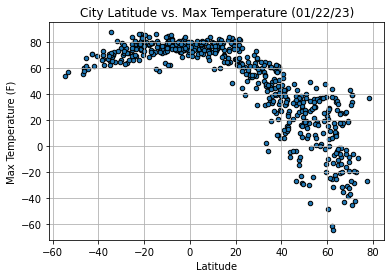

In [34]:
weather_df.plot(kind="scatter",x="Lat", y="Max Temp", grid=True, xlabel="Latitude",
                 ylabel="Max Temperature (F)", title= "City Latitude vs. Max Temperature (01/22/23)", edgecolor='k')

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'City Latitude vs. Humidity (01/22/23)'}, xlabel='Latitude', ylabel='Humidity (%)'>

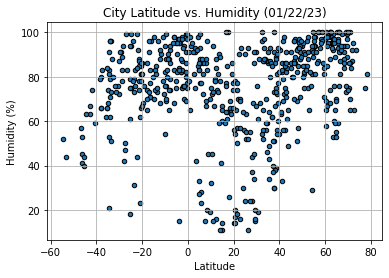

In [33]:
weather_df.plot(kind="scatter",x="Lat", y="Humidity", grid=True, xlabel="Latitude",
                 ylabel="Humidity (%)", title= "City Latitude vs. Humidity (01/22/23)", edgecolor='k')

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness (01/22/23)'}, xlabel='Latitude', ylabel='Cloudiness (%)'>

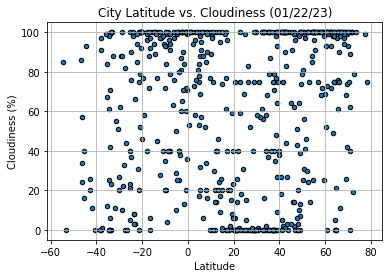

In [35]:
weather_df.plot(kind="scatter",x="Lat", y="Cloudiness", grid=True, xlabel="Latitude",
                 ylabel="Cloudiness (%)", title= "City Latitude vs. Cloudiness (01/22/23)", edgecolor='k')

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'City Latitude vs. Wind Speed (01/22/23)'}, xlabel='Latitude', ylabel='Wind Speed (mph)'>

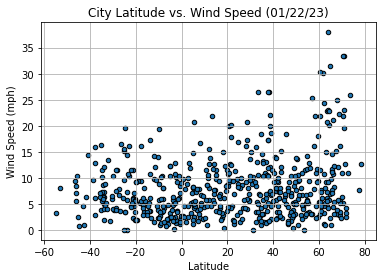

In [36]:
weather_df.plot(kind="scatter",x="Lat", y="Wind Speed", grid=True, xlabel="Latitude",
                 ylabel="Wind Speed (mph)", title= "City Latitude vs. Wind Speed (01/22/23)", edgecolor='k')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


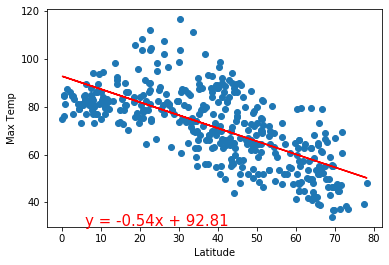

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


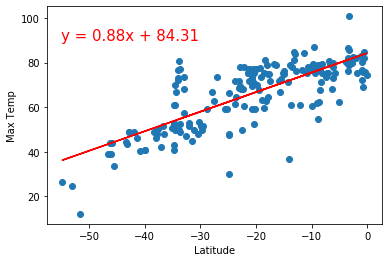

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


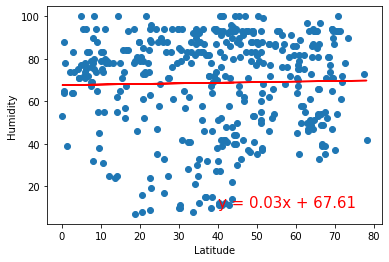

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


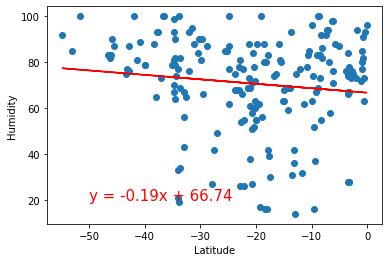

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


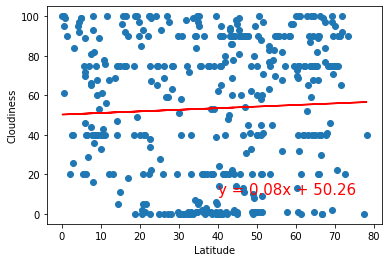

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


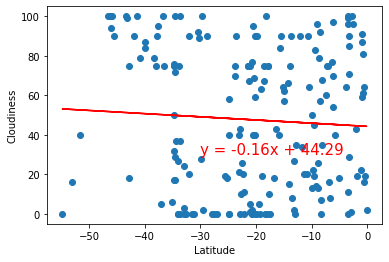

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


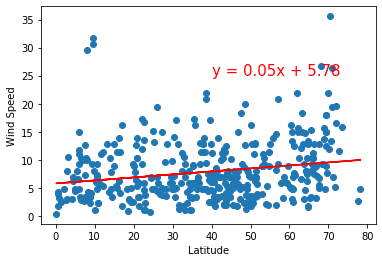

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


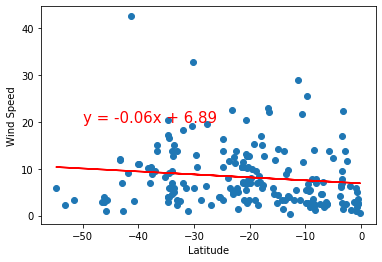